In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps = pd.read_csv("/Users/Carlos/Desktop/Ironhack/REPOS/proyecto/storytelling-project/Data/msft.csv")

In [3]:
apps = apps.dropna()

In [4]:
apps

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00


In [5]:
apps[["Name","Rating","Category"]]

,Name,Rating,Category
0,Dynamic Reader,3.5,Books
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,Books
2,BookViewer,3.5,Books
3,Brick Instructions,3.5,Books
4,Introduction to Python Programming by GoLearni...,2.0,Books
...,...,...,...
5316,Get Color,3.0,Developer Tools
5317,JS King,1.0,Developer Tools
5318,MQTTSniffer,2.5,Developer Tools
5319,"Dev Utils - JSON, CSV and XML",4.0,Developer Tools


In [6]:
def sortrat (rating):
    if rating > 3.5:
        return apps[["Name","Rating","Category"]].sort_values("Rating",ascending= False,ignore_index=True)

In [7]:
sortrat(4)

,Name,Rating,Category
0,Inner Kung Fu Game,5.0,Health and Fitness
1,Windows Package Manager YAML Generator,5.0,Developer Tools
2,Color Factory,5.0,Multimedia Design
3,Pick App,5.0,Multimedia Design
4,Brainf*ck# (Preview),5.0,Developer Tools
...,...,...,...
5316,Miracle Games Advertisment Platform,1.0,News and Weather
5317,eBooks for Kindle,1.0,Books
5318,"eBook Reader (ePub, Mobi and PDF books)",1.0,Books
5319,Kids & Games,1.0,Kids and Family


In [8]:
def searchapp (n):
        return apps.iloc[n]

In [9]:
searchapp(1:3)

SyntaxError: invalid syntax (<ipython-input-9-3c4e08abd3e0>, line 1)

In [ ]:
apps.iloc[1:100,1]

In [10]:
apps["Total Rating"]=apps.Rating * apps["No of people Rated"]

In [11]:
apps["Total Rating"].sort_values(ascending= False,ignore_index=True)

0       4995.0
1       4990.0
2       4990.0
3       4980.0
4       4965.0
         ...  
5316     129.0
5317     118.0
5318     115.0
5319     108.0
5320     108.0
Name: Total Rating, Length: 5321, dtype: float64

In [12]:
apps[["Rating","No of people Rated","Total Rating"]]

,Rating,No of people Rated,Total Rating
0,3.5,268,938.0
1,3.0,627,1881.0
2,3.5,593,2075.5
3,3.5,684,2394.0
4,2.0,634,1268.0
...,...,...,...
5316,3.0,785,2355.0
5317,1.0,720,720.0
5318,2.5,500,1250.0
5319,4.0,862,3448.0


In [13]:
apps.groupby("Total Rating").agg("max")

,Name,Rating,No of people Rated,Category,Date,Price
Total Rating,,,,,,
108.0,Model Railroad Manager,1.0,108,Navigation and Maps,20-11-2017,Free
115.0,MSAR,1.0,115,Government and Politics,19-05-2016,Free
118.0,RandomNumberGen,1.0,118,Developer Tools,23-03-2017,Free
129.0,New Age Player,1.0,129,Music,27-12-2013,Free
130.0,Client for Amazon Photos.,1.0,130,Business,05-05-2020,₹ 269.00
...,...,...,...,...,...,...
4945.0,BIOSToolKit,5.0,989,Developer Tools,26-07-2018,Free
4965.0,Magenta Health,5.0,993,Health and Fitness,28-02-2016,Free
4980.0,Five Good Things,5.0,996,Lifestyle,16-10-2016,Free


In [14]:
def ratingsearch(r):
    """"
    This function returns the apps table sorted by the rating you specified.
    Input: r = Rating you want to search by.
    Output : Apps dataframe only with the rating you specified.
    """
    for n in apps["Rating"]:
        return apps.where(apps['Rating'] == r).dropna()

In [15]:
ratingsearch(5).where(apps["Price"] == "Free").dropna().reset_index()

,index,Name,Rating,No of people Rated,Category,Date,Price,Total Rating
0,57,Easy Typing Practice in 1 Day,5.0,534.0,Books,27-05-2020,Free,2670.0
1,73,Learn Xcode 101 by WAGmob,5.0,864.0,Books,01-03-2013,Free,4320.0
2,85,A Romance Novel by Jane Austen,5.0,908.0,Books,18-08-2017,Free,4540.0
3,86,Learn Bhim App,5.0,134.0,Books,04-05-2017,Free,670.0
4,109,Learn Larivaar,5.0,841.0,Books,06-12-2016,Free,4205.0
...,...,...,...,...,...,...,...,...
951,5140,Quick Weather,5.0,584.0,News and Weather,23-02-2016,Free,2920.0
952,5143,News from Hungary,5.0,851.0,News and Weather,13-10-2017,Free,4255.0
953,5144,News Tile,5.0,858.0,News and Weather,16-04-2018,Free,4290.0
954,5158,Kad će Kiša,5.0,517.0,News and Weather,23-10-2017,Free,2585.0


In [16]:
freeapps = apps.where(apps['Price'] == "Free").dropna()

In [17]:
freeapps

,Name,Rating,No of people Rated,Category,Date,Price,Total Rating
0,Dynamic Reader,3.5,268.0,Books,07-01-2014,Free,938.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627.0,Books,08-01-2014,Free,1881.0
2,BookViewer,3.5,593.0,Books,29-02-2016,Free,2075.5
3,Brick Instructions,3.5,684.0,Books,30-01-2018,Free,2394.0
4,Introduction to Python Programming by GoLearni...,2.0,634.0,Books,30-01-2018,Free,1268.0
...,...,...,...,...,...,...,...
5158,Kad će Kiša,5.0,517.0,News and Weather,23-10-2017,Free,2585.0
5159,Newseen,4.5,948.0,News and Weather,19-05-2013,Free,4266.0
5160,Newser,3.5,502.0,News and Weather,06-06-2013,Free,1757.0
5161,Recent Earthquakes,3.0,419.0,News and Weather,14-11-2012,Free,1257.0


In [18]:
apps.sort_values(["Total Rating"],ascending=False).head(20)

,Name,Rating,No of people Rated,Category,Date,Price,Total Rating
1883,ILN,5.0,999,Social,05-12-2019,Free,4995.0
319,TookBook,5.0,998,Books,26-06-2018,Free,4990.0
3406,Contemplatio - Rosary with images,5.0,998,Lifestyle,13-08-2018,Free,4990.0
3241,Five Good Things,5.0,996,Lifestyle,16-10-2016,Free,4980.0
2662,Magenta Health,5.0,993,Health and Fitness,28-02-2016,Free,4965.0
1469,BIOSToolKit,5.0,989,Developer Tools,26-07-2018,Free,4945.0
2038,Parents Worship Day,5.0,988,Social,09-02-2015,Free,4940.0
252,Ask Sai,5.0,988,Books,17-04-2011,Free,4940.0
5305,Littledot,5.0,987,Developer Tools,23-03-2019,₹ 79.00,4935.0
4653,See Tow Bus,5.0,986,Navigation and Maps,25-10-2018,Free,4930.0


In [19]:
rating = apps["Rating"]
cat = apps["Category"]


<AxesSubplot:xlabel='Rating', ylabel='Category'>

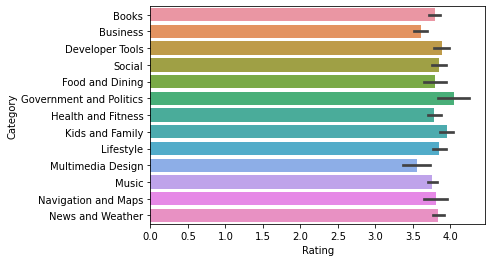

In [20]:
sns.barplot(rating,cat)

In [21]:
a = ratingsearch(5).where(apps["Price"] == "Free").dropna().reset_index()
b = a["Category"].value_counts()

<AxesSubplot:ylabel='Category'>

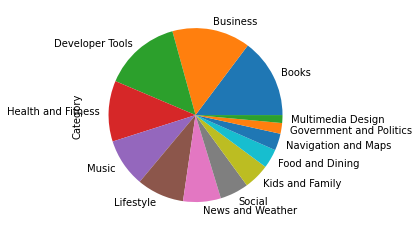

In [22]:
b.plot.pie()

In [23]:
def priceapp (name):
    """
    This function returns the price of an app with the index number of the same.
    Input = Name of the app, you have to refer to it with "".
    Output = Index number and price of the app
    """
    
    return apps["Price"].where(apps["Name"] == f"{name}").dropna().reset_index()
   

In [24]:
priceapp("Littledot")

,index,Price
0,5305,₹ 79.00


In [ ]:
re.findall(r"\d+.\d+",str(apps["Price"]))

In [35]:
def currency(x):
    res = re.findall(r"\d+.\d+",x)
    if x == "Free":
        return 0.0
    elif res:
        return float(res[0])*0.012

In [ ]:
apps["Price"]= str(apps["Price"]).replace(",","")

In [ ]:
apps["Price"].value_counts()

In [36]:
apps["Price"] = apps["Price"].apply(currency)

In [25]:
apps.Price

0           Free
1           Free
2           Free
3           Free
4           Free
          ...   
5316     ₹ 54.50
5317    ₹ 269.00
5318     ₹ 64.00
5319    ₹ 269.00
5320    ₹ 219.00
Name: Price, Length: 5321, dtype: object

In [ ]:
apps

In [ ]:
apps

In [ ]:
def probando (x):
    re.sub(r',','.',x)
    return x

In [ ]:
apps["probandomas"] = apps["Price"].apply(probando)

In [ ]:
str(apps.Price)

In [ ]:
re.sub()

In [ ]:
apps.Price.value_counts()

In [31]:
apps["Price"] = apps.Price.apply(lambda x: x.replace(",",""))

In [37]:
apps

,Name,Rating,No of people Rated,Category,Date,Price,Total Rating
0,Dynamic Reader,3.5,268,Books,07-01-2014,0.000,938.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0.000,1881.0
2,BookViewer,3.5,593,Books,29-02-2016,0.000,2075.5
3,Brick Instructions,3.5,684,Books,30-01-2018,0.000,2394.0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0.000,1268.0
...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,0.654,2355.0
5317,JS King,1.0,720,Developer Tools,19-07-2018,3.228,720.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,0.768,1250.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,3.228,3448.0
